In [1]:
from megaunidec import *
from unidec_modules import unidectools as ud

In [2]:
mega = MegaUniDec()


UniDec Engine v.4.4.0

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.4.4.0

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.4.4.0

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe


Reading mzML: C:\Users\cm19ljc\Documents\GitHub\UniDec\mzML\mzML.mzML
[Warning] Not index found and build_index_from_scratch is False
Converted to gzip file to improve speed: C:\Users\cm19ljc\Documents\GitHub\UniDec\mzML\mzML.mzML.gz
Error getting TIC in mzML; trying to make it...
Imported Data. Constructing TIC
Done


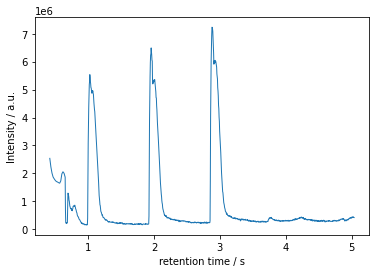

In [3]:
mega.import_mzml("C:\\Users\\cm19ljc\\Documents\\GitHub\\UniDec\\mzML\\mzML.mzML")

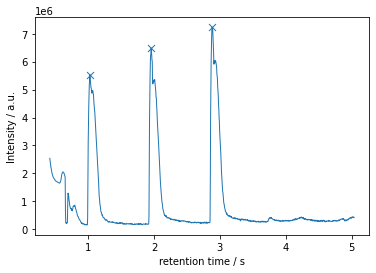

In [4]:
peaks = mega.pick_peaks(show_tic = True)


In [5]:
mega.folder


'C:\\Users\\cm19ljc\\Documents\\GitHub\\UniDec\\mzML\\megaunidecfiles_mzML.mzML'

In [6]:
mega.to_hdf5()

C:\Users\cm19ljc\Documents\GitHub\UniDec\mzML\mzML.hdf5 created


In [7]:
meta = mega.to_meta()

In [8]:
meta.process_data()

Execution Time: 0.03674959999999938


In [9]:
meta.run_unidec()

Execution Time: 1.7088282999999995


In [10]:
meta.config.peaknorm = 0
meta.pick_peaks()

Execution Time: 0.07281400000000016
Peak info saved to: C:\Users\cm19ljc\Documents\GitHub\UniDec\mzML\UniDec_Figures_and_Files\mzML_extracts.txt


In [11]:
# peaks
mass = []
height = []
extracts = []
for i, p in enumerate(meta.pks.peaks):
    mass.append(p.mass)
    height.append(p.height)
    

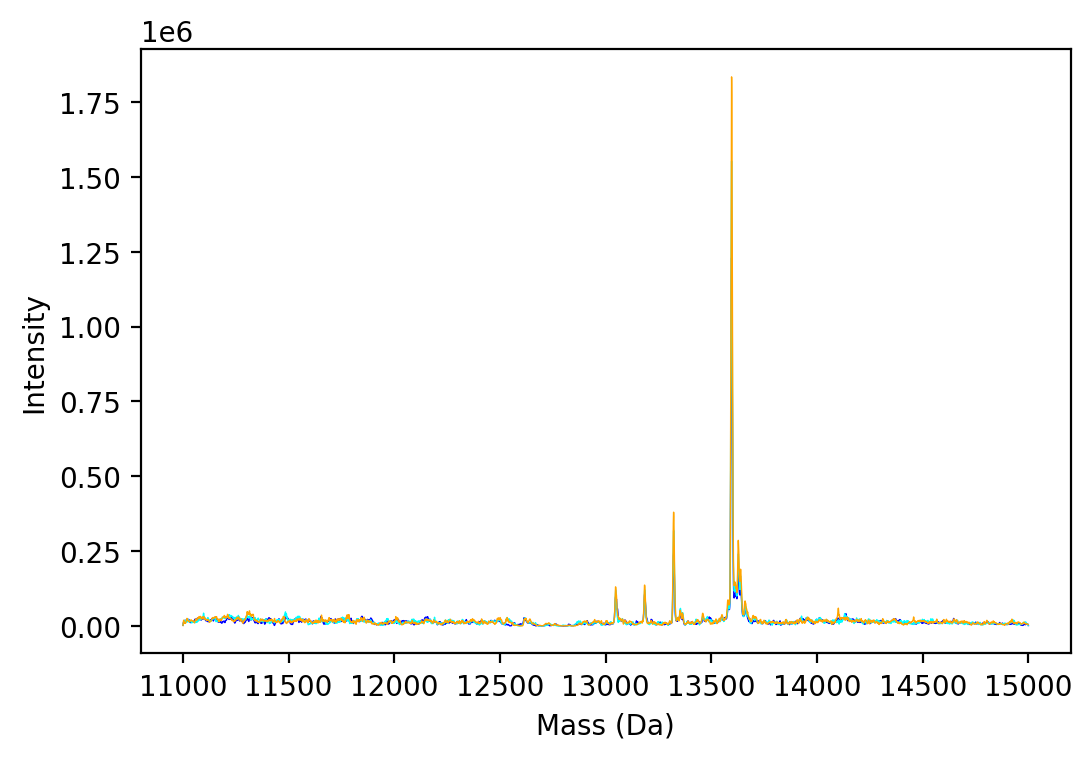

In [12]:
spectra = meta.data.get_spectra()

if len(spectra) > meta.config.crossover:
        mult = int(len(spectra) / meta.config.numtot)
else:
    mult = 1

color = ['blue', 'cyan', 'orange']

fig, ax = plt.subplots(dpi = 200)
for i, s in enumerate(spectra[::mult]):
    
    ax.plot(s.massdat[:, 0], s.massdat[:, 1], color = color[i],lw = 0.5)
    ax.set_xlabel('Mass (Da)')
    ax.set_ylabel("Intensity")
    
# for i, p in enumerate()
# ax.scatter(mass, height)
# plt.show()

In [13]:
for i, p in enumerate(meta.pks.peaks):
    print(p.mass, p.height)
    
print(meta.pks.norm)

13047.1 138129.36
13184.3 143655.42
13321.5 375188.84
13595.5 1833699.9
1


In [14]:
meta.data.var1 = np.array([0, 1, 2])
var1 = meta.data.var1

fitgrid = meta.data.exgrid # (peak.extracts)
ignore = meta.data.get_bool()

A [ 98027.164 119626.625 130009.83 ] ○
138129.36
B [104316.1   121013.766 136243.72 ] ▽
143655.42
C [245571.34 319027.06 379728.9 ] △
375188.84
D [1229377.  1552240.8 1833692.4] ▷
1833699.9


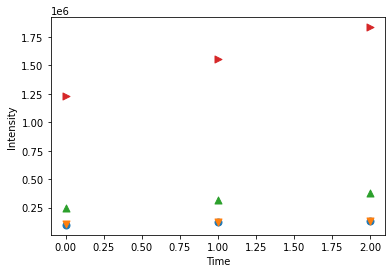

In [15]:
for i, p in enumerate(meta.pks.peaks):
    print(meta.pks.peaks[i].label, fitgrid[i], meta.pks.textmarkers[i])
    plt.scatter(var1, fitgrid[i], marker = meta.pks.markers[i])
    plt.ylabel("Intensity")
    plt.xlabel("Time")
    print(meta.pks.peaks[i].height)
plt.show()


In [16]:
for i in meta.pks.peaks:
    print(i.mass, i.height)

13047.1 138129.36
13184.3 143655.42
13321.5 375188.84
13595.5 1833699.9


In [17]:
masslist = []
heightlist = []
for i, p in enumerate(meta.pks.peaks):
    print(fitgrid[i])
    print(meta.pks.textmarkers[i])
    print(meta.pks.markers[i])
    print(meta.pks.peaks[i].label)

[ 98027.164 119626.625 130009.83 ]
○
o
A
[104316.1   121013.766 136243.72 ]
▽
v
B
[245571.34 319027.06 379728.9 ]
△
^
C
[1229377.  1552240.8 1833692.4]
▷
>
D


In [18]:
spectra = meta.data.get_spectra()

spectra

o
v
^
>
o
v
^
>
o
v
^
>


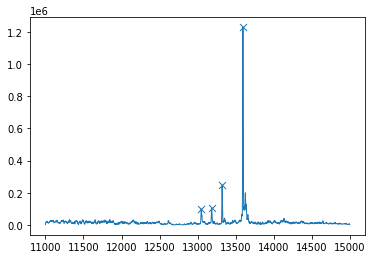

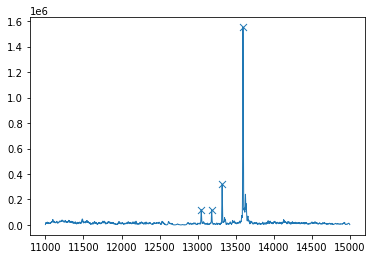

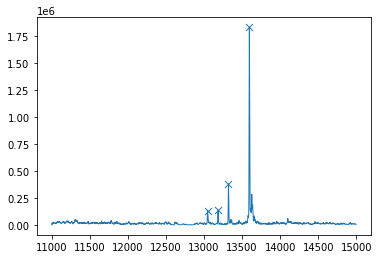

In [19]:
for s in meta.data.spectra:
    height = []
    mass = []
    for p in s.pks.peaks:
        height.append(p.height)
        mass.append(p.mass)
        print(p.marker)
    plt.figure()
    plt.plot(s.massdat[:, 0], s.massdat[:, 1])
    plt.scatter(mass, height, marker = 'x')

In [20]:
mega.ticpeaks

array([[1.027050e+00, 5.536328e+06],
       [1.957470e+00, 6.491776e+06],
       [2.880050e+00, 7.231632e+06]])